In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd "drive/MyDrive/projects/ImageNet"

/content/drive/MyDrive/projects/ImageNet


In [ ]:
!ls

AlexNet  AlexNetModel.pth  data  ImageNet


In [ ]:
import os

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

from torch.utils.data import Dataset, DataLoader
import torch

from torchvision import transforms, utils
from skimage import io, transform

import torchvision.transforms as transforms

from torchvision import models

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# print(torch.cuda.get_device_name(0))

In [ ]:
# Put file path as a string here
data_dir = 'data/'

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        cifar_dict = pickle.load(fo, encoding='bytes')
    return cifar_dict

In [ ]:
dirs = os.listdir(data_dir)
dirs

['mini-imagenet-cache-test.pkl',
 'mini-imagenet-cache-train.pkl',
 'mini-imagenet-cache-val.pkl']

In [ ]:
all_data = [0,1,2]

for i,direc in zip(all_data,dirs):
    all_data[i] = unpickle(data_dir+direc)

In [ ]:
mini_imagenet_test = all_data[0]
mini_imagenet_train = all_data[1]
mini_imagenet_val = all_data[2]

In [ ]:
mini_imagenet_test.keys()

dict_keys(['image_data', 'class_dict'])

In [ ]:

def label_dict_maker(dt):

  actual_labels = list(dt["class_dict"].keys())
  Labels_list = list(range(len(actual_labels)))
  print(Labels_list)

  transformed_dict = {}

  for i in range(len(Labels_list)):
    transformed_dict[i] = dt["class_dict"][actual_labels[i]]
  return transformed_dict

In [ ]:
# len(mini_imagenet_val["class_dict"].keys())

train_transformed_dict = label_dict_maker(mini_imagenet_train)
test_transformed_dict = label_dict_maker(mini_imagenet_test)
val_transformed_dict = label_dict_maker(mini_imagenet_val)

# X = mini_imagenet_train['image_data']
Y = mini_imagenet_train['class_dict']

# print(len(X))

# plt.imshow(X[1700])
print(Y.keys())

# X[1].shape

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
dict_keys(['n01532829', 'n01558993', 'n01704323', 'n01749939', 'n01770081', 'n01843383', 'n01910747', 'n02074367', 'n02089867', 'n02091831', 'n02101006', 'n02105505', 'n02108089', 'n02108551', 'n02108915', 'n02111277', 'n02113712', 'n02120079', 'n02165456', 'n02457408', 'n02606052', 'n02687172', 'n02747177', 'n02795169', 'n02823428', 'n02966193', 'n03017168', 'n03047690', 'n03062245', 'n03207743', 'n03220513', 'n03337140', 'n03347037', 'n03400231', 'n03476684', 'n03527444', 'n03676483', 'n03838899', 'n03854065', 'n03888605', 'n03908618', 'n03924679', 'n03998194', 'n04067472', 'n04243546', 'n04251144', 'n04258138', 'n042

#DataSet Generation

In [ ]:
class MiniImageNetDataset(Dataset):
    """Mini ImageNet Dataset."""

    def __init__(self, labels_dict, image_data, transform):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.labels_dict = labels_dict
        self.image_data = image_data
        self.transform = transform

    def __len__(self):
        return len(self.image_data)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        # image = torch.from_numpy(self.image_data[idx]).long().reshape(3,84,84)
        image = self.image_data[idx]


        for key, value in self.labels_dict.items():
          if idx in value:
              label = key
        y_label = label


        if self.transform is not None:
            # print("I am here")
            image = self.transform(image)

        return (image, y_label)

In [ ]:
train_dataset = MiniImageNetDataset(labels_dict = train_transformed_dict, image_data=mini_imagenet_train['image_data'], transform=transformation)

In [ ]:
for i in range(1800,1801):
    sample = train_dataset[i]

    print(i, sample[0])
    

    print(sample[0].shape)
    


1800 tensor([[[0.0745, 0.0745, 0.0863,  ..., 0.7961, 0.7922, 0.7922],
         [0.0784, 0.0784, 0.0863,  ..., 0.8000, 0.7961, 0.7961],
         [0.0902, 0.0902, 0.0941,  ..., 0.8353, 0.8235, 0.8235],
         ...,
         [0.0667, 0.0667, 0.0706,  ..., 0.6314, 0.6039, 0.6000],
         [0.0667, 0.0667, 0.0706,  ..., 0.5961, 0.5804, 0.5765],
         [0.0667, 0.0667, 0.0706,  ..., 0.5882, 0.5765, 0.5725]],

        [[0.1529, 0.1529, 0.1529,  ..., 0.6627, 0.6784, 0.6824],
         [0.1569, 0.1569, 0.1569,  ..., 0.6627, 0.6745, 0.6784],
         [0.1765, 0.1765, 0.1686,  ..., 0.6510, 0.6588, 0.6627],
         ...,
         [0.0627, 0.0627, 0.0667,  ..., 0.3137, 0.3137, 0.3137],
         [0.0627, 0.0627, 0.0667,  ..., 0.3098, 0.3176, 0.3176],
         [0.0627, 0.0627, 0.0667,  ..., 0.3098, 0.3176, 0.3176]],

        [[0.0235, 0.0275, 0.0431,  ..., 0.6431, 0.6706, 0.6745],
         [0.0275, 0.0275, 0.0431,  ..., 0.6392, 0.6667, 0.6706],
         [0.0392, 0.0392, 0.0431,  ..., 0.6235, 0.643

torch.Size([3, 224, 224])


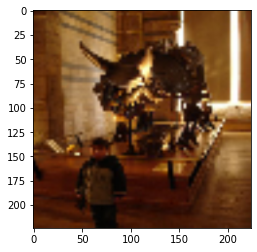

In [ ]:
for i in range(1307,1308):
    sample = train_dataset[i]

print(sample[0].shape)
# plt.imshow(sample[0].view(227,227,3))

plt.imshow(sample[0].permute(1,2,0))


# plt.imshow(sample[0].view(84,84,3))

#Dataloader Creation

In [ ]:
# transformation = transforms.Compose([transforms.RandomHorizontalFlip()])

# transformation = transforms.Compose([transforms.Resize(227, antialias=True)])

transformation = transforms.Compose([
                                     transforms.ToPILImage(),
                                    #  transforms.RandomHorizontalFlip(p = 0.5),
                                     transforms.Resize(224),
                                     transforms.ToTensor(),
                                    #  transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
train_dataset = MiniImageNetDataset(labels_dict = train_transformed_dict, image_data=mini_imagenet_train['image_data'], transform=transformation)
val_dataset = MiniImageNetDataset(labels_dict = val_transformed_dict, image_data=mini_imagenet_val['image_data'], transform=transformation)

# train_dataset = train_dataset.type(torch.LongTensor)


train_loader = DataLoader(dataset=train_dataset, shuffle=True, batch_size=32, num_workers=2, pin_memory=True)
val_loader = DataLoader(dataset=val_dataset, shuffle=True, batch_size=32, num_workers=2, pin_memory=True)


In [ ]:
inputs, classes = next(iter(train_loader))
print(classes)
# plt.imshow(inputs.squeeze())

tensor([17, 43, 20, 47, 41, 33,  1, 17, 54, 42, 63, 11, 57, 49, 12, 48, 28, 28,
        22, 51, 52, 32, 62, 54, 10, 42, 62, 15, 46, 35, 52, 45])


#Making AlexNet Model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:

class AlexNet(nn.Module):
  def __init__(self):
    super().__init__()
    
    # Convolutional Layers
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=11, stride=4, padding=2)
    self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2)
    self.conv2 = nn.Conv2d(in_channels=64, out_channels=192, kernel_size=5, stride=1, padding=2)
    self.pool2 = nn.MaxPool2d(kernel_size=3, stride=2)
    self.conv3 = nn.Conv2d(in_channels=192, out_channels=384, kernel_size=3, stride=1, padding=1)
    self.conv4 = nn.Conv2d(in_channels=384, out_channels=256, kernel_size = 3, stride=1, padding=1)
    self.conv5 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1)
    self.pool3 = nn.MaxPool2d(kernel_size=3, stride=2)

    self.avgpool = nn.AdaptiveAvgPool2d((6, 6))

    # Fully Connected Layers
    self.fc1 = nn.Linear(in_features=256*6*6, out_features=4096)
    self.fc2 = nn.Linear(in_features=4096, out_features=4096)
    self.fc3 = nn.Linear(in_features=4096, out_features=10)



    # Dropout for preventing overfitting
    self.dropout = nn.Dropout(0.5, inplace=True)

  def forward(self, x):
    x = self.pool1(F.relu(self.conv1(x)))
    # print(x.shape)
    x = self.pool2(F.relu(self.conv2(x)))
    # print(x.shape)
    x = F.relu(self.conv3(x))
    # print(x.shape)
    x = F.relu(self.conv4(x))
    # print(x.shape)
    x = self.pool3(F.relu(self.conv5(x)))
    x = self.avgpool(x)
    # print(x.shape)
    x = torch.flatten(x, 1)
    # print("Started FC Layers")
    x = self.dropout(x)
    x = F.relu(self.fc1(x))
    x = self.dropout(x)
    # print(x.shape)
    x = F.relu(self.fc2(x))
    # print(x.shape)
    x = (self.fc3(x))
    return x


In [ ]:
model = AlexNet()

In [ ]:
model

AlexNet(
  (conv1): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (pool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (fc1): Linear(in_features=9216, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=4096, bias=True)
  (fc3): Linear(in_features=4096, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=True)
)

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # calculate outputs by running images through the network

        images = images.float()

        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))
print("Correct: ", correct)
print("Total: ", total)



/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Accuracy of the network on the 10000 test images: 3 %
Correct:  454
Total:  12000


#Training

In [ ]:
import torch.optim as optim


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), momentum=0.9, weight_decay=0.0005, lr=0.01)



In [ ]:
PATH = "./AlexNetModel"

num_epoch = 90

# model = net

model = model.to(device)

for epoch in range(num_epoch):
 
  running_loss = 0.0
  val_loss = 0  

  count = 0 
  for i, data in enumerate(train_loader):
    

    inputs, labels = data
    # inputs = inputs.float()

    inputs = inputs.to(device)
    labels = labels.to(device)

    # print(labels)
    # print(inputs, labels)

    # resetting the gradients to zero
    optimizer.zero_grad()

    # forward pass
    outputs = model(inputs)
    # calculating loss
    loss = criterion(outputs, labels)
    # backward pass
    loss.backward()
    # Taking optimization step
    optimizer.step()

    # Printing statistics ever epoch
    running_loss += loss.item()

  for j, data in enumerate(train_loader):

    inputs, labels = data

    inputs = inputs.to(device)
    labels = labels.to(device)
    targets = model(inputs)
    v_loss = criterion(targets, labels)
    val_loss += v_loss.item()


  # if i % 500 == 499:
  print('[%d, %5d] training loss: %.3f Validation Loss: %.3f' %(epoch+1, i+1, running_loss / 500, val_loss / 500))
  running_loss = 0.0
  
  if (epoch%5 == 0):
    torch.save(model.state_dict(), (PATH+str(epoch)+".pth"))
    print("saved")
# print("Finished Training")



[1,  1200] training loss: 8.622 Validation Loss: 8.296
saved
[2,  1200] training loss: 7.926 Validation Loss: 7.410
[3,  1200] training loss: 7.278 Validation Loss: 6.807
[4,  1200] training loss: 6.725 Validation Loss: 6.184
[5,  1200] training loss: 6.241 Validation Loss: 5.825
[6,  1200] training loss: 5.854 Validation Loss: 5.491
saved
[7,  1200] training loss: 5.521 Validation Loss: 5.170
[8,  1200] training loss: 5.251 Validation Loss: 4.885
[9,  1200] training loss: 4.980 Validation Loss: 4.465
[10,  1200] training loss: 4.765 Validation Loss: 4.405
[11,  1200] training loss: 4.581 Validation Loss: 4.408
saved
[12,  1200] training loss: 4.398 Validation Loss: 3.913
[13,  1200] training loss: 4.261 Validation Loss: 3.769
[14,  1200] training loss: 4.116 Validation Loss: 3.678
[15,  1200] training loss: 3.989 Validation Loss: 3.454
[16,  1200] training loss: 3.901 Validation Loss: 3.335
saved
[17,  1200] training loss: 3.787 Validation Loss: 3.511
[18,  1200] training loss: 3.710 

In [ ]:
# print(epoch)
torch.save(model.state_dict(), (PATH+str(epoch)+".pth"))

#Inference From Model

In [ ]:
test_dataset = MiniImageNetDataset(labels_dict = test_transformed_dict, image_data=mini_imagenet_test['image_data'], transform=transformation)

test_loader = DataLoader(dataset=test_dataset, shuffle=True, batch_size=32, num_workers=2, pin_memory=True)


In [ ]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

print(labels)

# print images
# imshow(torchvision.utils.make_grid(images))
# print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


tensor([ 8, 13,  7,  0, 13, 14, 19, 13, 19, 17, 19,  5,  6,  2,  3, 16, 16,  6,
         0, 11, 19,  2, 17, 13, 13, 10, 17,  3,  5, 18,  4,  0])


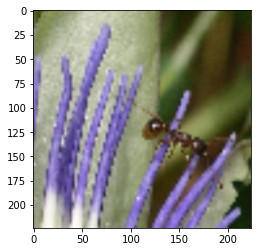

In [ ]:
plt.imshow(images[2].permute(1,2,0))


In [ ]:
PATH = "./AlexNetModel89.pth"

# !ls
net = AlexNet()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
outputs = net(images)

In [ ]:
print(outputs.shape)

torch.Size([32, 64])


In [ ]:
_, predicted = torch.max(outputs, 1)

print(predicted)


tensor([23, 35, 40, 31, 62, 22, 16, 23, 54, 60,  8, 49,  1, 52, 54, 57, 48,  0,
         4,  1,  2, 16, 16, 60, 25, 57, 48, 12, 45, 57, 46,  7])


In [ ]:
test_actual_labels = list(mini_imagenet_test['class_dict'].keys())

In [ ]:
print(type(test_actual_labels))

<class 'list'>


In [ ]:
# print('Predicted: ', ' '.join('%5s' % test_actual_labels[predicted[j]] for j in range(4)))



for j in range(4):
  print(test_actual_labels[predicted[j]])

IndexError: ignored

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        # calculate outputs by running images through the network

        images = images

        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        if (total > 10000):
          break

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))
print("Correct: ", correct)
print("Total: ", total)



Accuracy of the network on the 10000 test images: 74 %
Correct:  7442
Total:  10016


In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in val_loader:
        images, labels = data
        # calculate outputs by running images through the network

        images = images

        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        if (total > 10000):
          break

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))
print("Correct: ", correct)
print("Total: ", total)

Accuracy of the network on the 10000 test images: 1 %
Correct:  109
Total:  9600


# Training On CIFAR DATASET

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms


In [ ]:
transform = transforms.Compose([
    # [transforms.ToPILImage(),
     transforms.RandomHorizontalFlip(p = 0.5),
     transforms.Resize(224),
     transforms.ToTensor(),
    #  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

batch_size = 32

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

# print(type(trainset)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


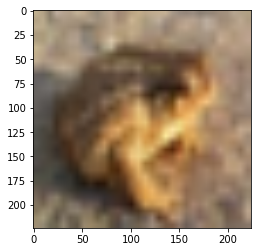

In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

def imshow(img):
    # img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

imshow(images[1])

In [ ]:
model = model.to(device)

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data

        images = images.to(device)
        labels = labels.to(device)
        # calculate outputs by running images through the network

        images = images

        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))
print("Correct: ", correct)
print("Total: ", total)



Accuracy of the network on the 10000 test images: 9 %
Correct:  993
Total:  10000


In [ ]:
import torch.optim as optim


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), momentum=0.9, weight_decay=0.0005, lr=0.01)



In [ ]:
PATH = "./AlexNetModelCifar"

num_epoch = 90

model = model.to(device)

for epoch in range(num_epoch):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        inputs = inputs.to(device)
        labels = labels.to(device)

        # print(inputs.shape)
        # print(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')

[1,   100] loss: 2.045
[1,   200] loss: 1.986
[1,   300] loss: 1.928
[1,   400] loss: 1.922
[1,   500] loss: 1.883
[1,   600] loss: 1.856
[1,   700] loss: 1.797
[1,   800] loss: 1.750
[1,   900] loss: 1.696
[1,  1000] loss: 1.666
[1,  1100] loss: 1.672
[1,  1200] loss: 1.611
[1,  1300] loss: 1.563
[1,  1400] loss: 1.563
[1,  1500] loss: 1.520
[2,   100] loss: 1.468
[2,   200] loss: 1.442
[2,   300] loss: 1.408
[2,   400] loss: 1.436
[2,   500] loss: 1.417
[2,   600] loss: 1.371
[2,   700] loss: 1.356
[2,   800] loss: 1.346
[2,   900] loss: 1.245
[2,  1000] loss: 1.314
[2,  1100] loss: 1.268
[2,  1200] loss: 1.245
[2,  1300] loss: 1.254
[2,  1400] loss: 1.233
[2,  1500] loss: 1.204
[3,   100] loss: 1.143
[3,   200] loss: 1.156
[3,   300] loss: 1.112
[3,   400] loss: 1.116
[3,   500] loss: 1.097
[3,   600] loss: 1.103
[3,   700] loss: 1.090
[3,   800] loss: 1.089
[3,   900] loss: 1.040
[3,  1000] loss: 1.045
[3,  1100] loss: 1.037
[3,  1200] loss: 1.005
[3,  1300] loss: 0.987
[3,  1400] 

KeyboardInterrupt: ignored

In [ ]:
torch.save(model.state_dict(), (PATH+str(epoch)+".pth"))
    

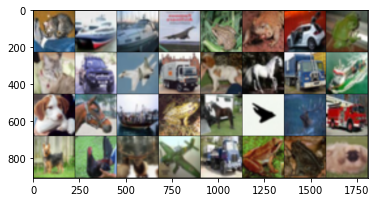

GroundTruth:    cat  ship  ship plane  frog  frog   car  frog   cat   car plane truck   dog horse truck  ship   dog horse  ship  frog horse plane  deer truck   dog  bird  deer plane truck  frog  frog   dog


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(32)))


In [ ]:
# !ls
PATH = "./AlexNetModelCifar51.pth"

net = AlexNet()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
outputs = net(images)


In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane


In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


Accuracy of the network on the 10000 test images: 81 %


TypeError: ignored

In [ ]:
print("Correct: ", correct)
print("Total: ", total)


Correct:  8182
Total:  10000
